### NOTE 
1) silhouette score determines how accurate is the clustered data ! 

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
df = sns.load_dataset('iris')

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
df.drop(columns="species",inplace=True)

In [39]:
df.to_csv('new_iris.csv',index=False)

In [40]:
iris = pd.read_csv('../GeneralDataset/new_iris.csv')

In [41]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


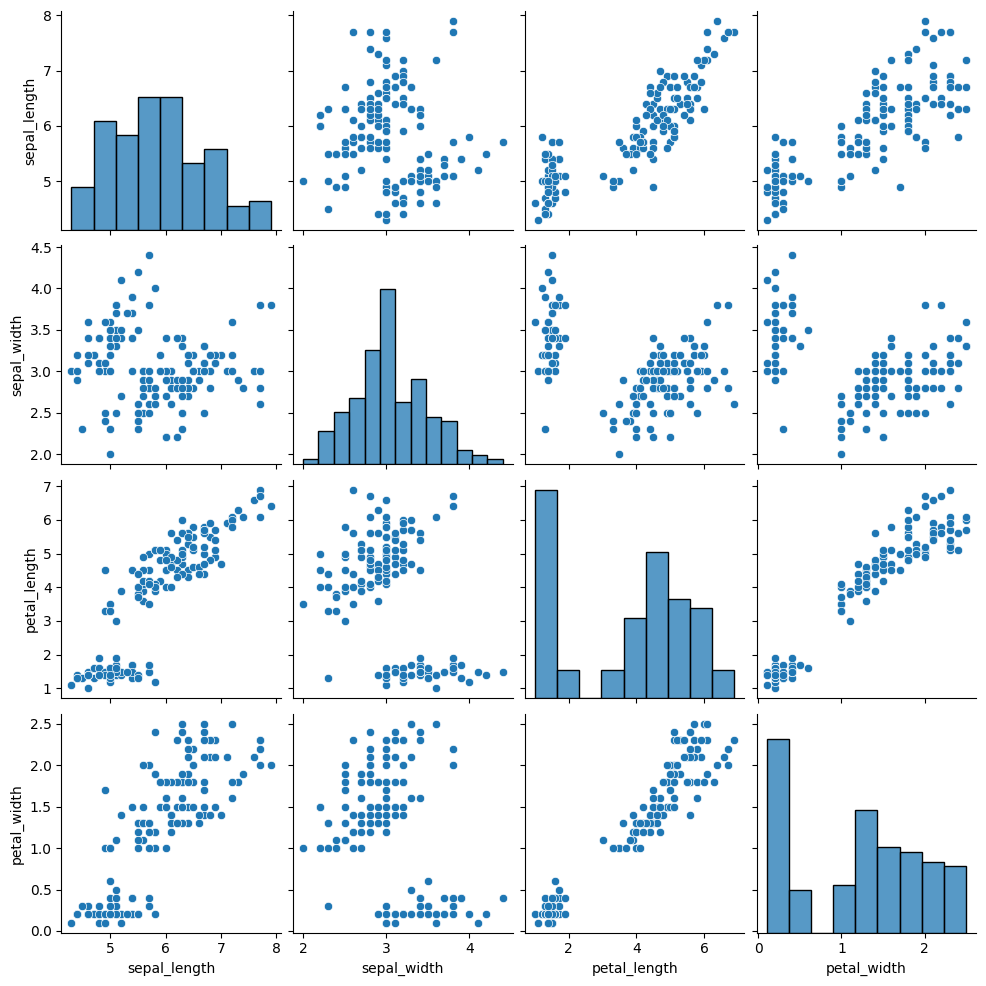

In [43]:
sns.pairplot(data=iris)

In [44]:
from sklearn.cluster import KMeans

In [45]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=i,init="k-means++")
    km.fit(iris)
    wcss.append(km.inertia_)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib

In [46]:
wcss

[152.34795176035792,
 78.8556658259773,
 57.38387326549491,
 46.6927,
 39.30610712530712,
 34.75674963924964,
 29.988943950786055,
 32.224400817639314,
 27.233838838697537,
 25.472915245573144,
 24.965855012634428,
 22.558665782539354,
 21.50478216374269,
 21.066975377563615,
 19.054722041847043,
 18.516465909090915,
 17.378969696969698,
 16.497615259740257,
 16.33985930735931]

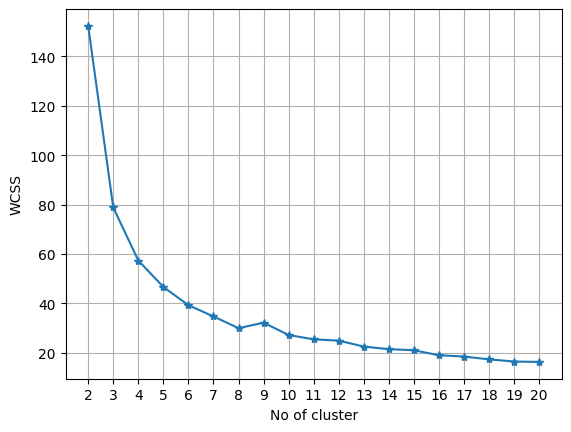

In [47]:
plt.plot([i for i in range(2,21)],wcss,marker="*")
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.xticks([i for i in range(2,21)])
plt.grid('x')
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
kmn = KMeans(n_clusters=3)
iris["predict"] = kmn.fit_predict(iris)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
iris

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


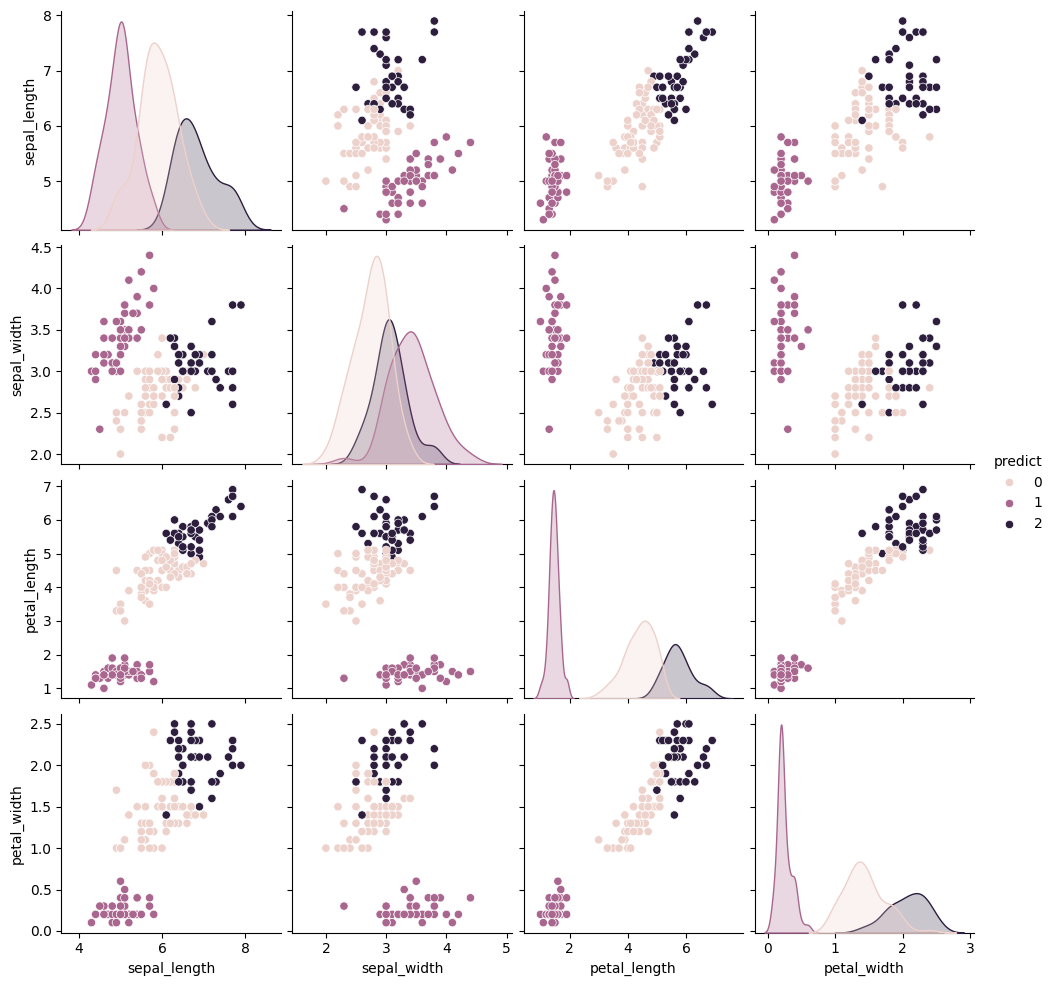

In [51]:
sns.pairplot(data=iris,hue="predict")

In [52]:
ori_iris = sns.load_dataset('iris')

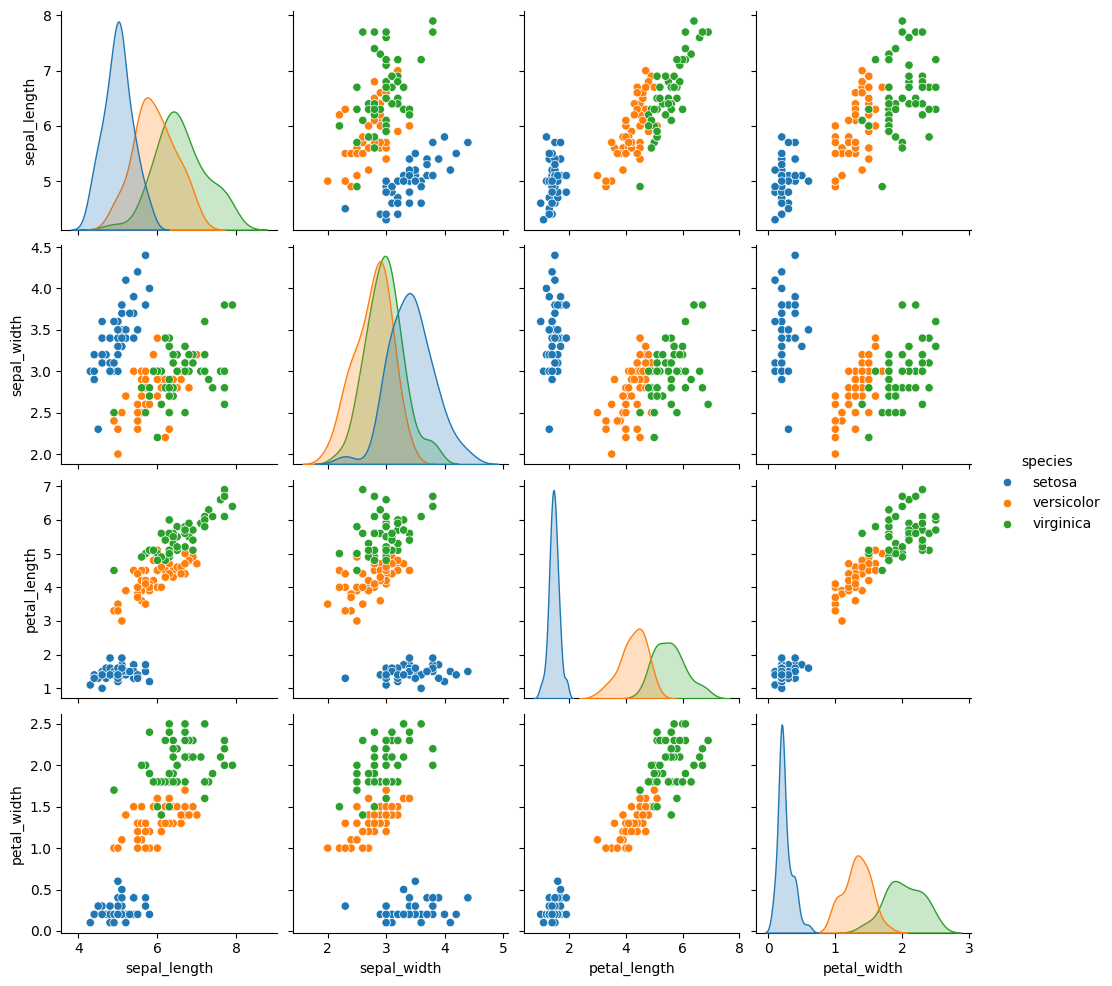

In [53]:
sns.pairplot(data=ori_iris,hue="species")

In [54]:
silhouette_score(df,labels=kmn.labels_)

0.5528190123564102

In [57]:
ss = []
no_of_clusters = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(df)
    ss.append(silhouette_score(df,km1.labels_))

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib

In [56]:
ss

[0.6810461692117465,
 0.5528190123564102,
 0.41042762634789764,
 0.3640626192644012,
 0.36598336415829236,
 0.34711634398659896,
 0.3434095411983846,
 0.30909785635922987,
 0.31350897691816115,
 0.31365210888219136,
 0.2680611219404193,
 0.2814513404067977,
 0.2647835130282534,
 0.26964792877331234,
 0.2688130210931964,
 0.27513788201451805,
 0.265260399665189,
 0.2724114719118044,
 0.29000355483956397]

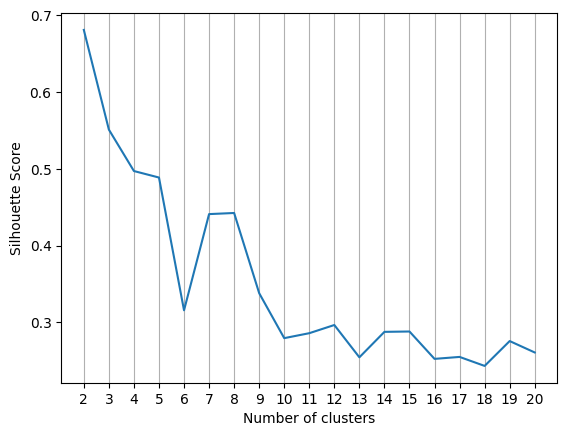

In [60]:
plt.plot(no_of_clusters,ss)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(no_of_clusters)
plt.grid(axis="x")
plt.show()